In [150]:
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [151]:
# Read data
Tbl = pd.read_csv('data_PBMR_400.csv')
 
# Extract data
Xvals = Tbl.iloc[:,1:-1].to_numpy()
Yvals = Tbl.iloc[:,-1].to_numpy()
timestamps = Tbl.iloc[:,0].to_numpy()
nRows, nCols = Xvals.shape
#Xavg = np.mean(Xvals, axis=1)
 
# define bins
binInt = 1.0e-06
binMax = 1.5e-04
hEdges = np.arange(0, binMax+binInt, binInt)
nBins = len(hEdges)-1
 
# fill histogram matrix
nCountsX = np.zeros((nRows, nBins), dtype=np.uint16)
for n in range(nRows):
    nCountsX[n,:], _ = np.histogram(Xvals[n,:], hEdges)
    
print(nRows, nBins)
 
# # plot histogram matrix
# fig, ax = plt.subplots()
# for n in range(nRows):
#     ax.bar(hEdges[:-1], nCountsX[n,:])
# ax.set_xlabel('Cs concentration')
# ax.set_ylabel('Count')
# ax.set_title('data_PBMR_400 Histogram')
# plt.show()

235 150


In [152]:
def bin_names(arr):
    arr_names = []
    for i in range(len(arr)):
        arr[i] = np.format_float_scientific(arr[i], unique=False, precision=2)
        if i+2 > len(arr):
            break
        else:
            arr[i+1] = np.format_float_scientific(arr[i+1], unique=False, precision=2)
            arr_names.append(str([str(arr[i]) + ':' + str(arr[i+1])]))
    return arr_names

hEdges_name = bin_names(hEdges)

In [153]:
counts_df = pd.DataFrame(nCountsX)

In [154]:
counts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,3852,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3922,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3971,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3704,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
counts_df.columns = hEdges_name

In [159]:
counts_df.index = timestamps
counts_df.index.name = 't'

In [178]:
columnlen = []
for i in range(len(counts_df.columns)):
    columnlen.append(counts_df.iloc[:,i].sum())

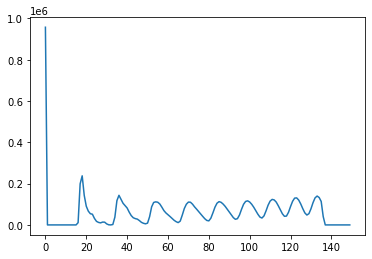

In [179]:
plt.plot(columnlen)

In [181]:
counts_df.to_csv('binnedpebbles.csv')